<a href="https://colab.research.google.com/github/luckedenn/ProyekAnalisis/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Lucas Chandra
- **Email:** lucaschandra18@gmail.com
- **ID Dicoding:** lucas_chndra

## Menentukan Pertanyaan Bisnis

- Bagaimana tren perubahan polusi PM2.5 dari tahun ke tahun?
- Bagaimana pengaruh suhu (TEMP) terhadap tingkat polusi PM2.5?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [3]:
zip_path = "/content/drive/My Drive/Dicoding/Air-quality-dataset.zip"

# Path tujuan ekstraksi
extract_path = "/content/dataset_air_quality"

# Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset berhasil diekstrak ke:", extract_path)

Dataset berhasil diekstrak ke: /content/dataset_air_quality


In [4]:
# Path ke folder dataset
dataset_path = "/content/dataset_air_quality/PRSA_Data_20130301-20170228"

# Gabungkan semua file CSV dari berbagai stasiun
dataframes = []
for file in os.listdir(dataset_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(dataset_path, file))
        dataframes.append(df)

# Gabungkan semua data dalam satu DataFrame
df_all = pd.concat(dataframes, ignore_index=True)

# Konversi kolom waktu menjadi datetime
df_all['datetime'] = pd.to_datetime(df_all[['year', 'month', 'day', 'hour']])

In [5]:
df_all.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00


**Insight:**
- Kita harus mengekstrak datasetnya karena masi dalam bentuk zip
- ada banyak sekali file csv dalam dataset tersebut jadi kita harus menerapkan metode join.

### Assessing Data

In [6]:
# Cek missing values
missing_values = df_all.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
wd        1822
WSPM       318
dtype: int64


In [7]:
# Cek duplikasi data
duplicate_rows = df_all.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_rows}")

Jumlah data duplikat: 0


In [8]:
# Cek tipe data yang unik pada setiap kolom
for col in df_all.columns:
    print(f"Kolom {col} memiliki {df_all[col].nunique()} nilai unik")

Kolom No memiliki 35064 nilai unik
Kolom year memiliki 5 nilai unik
Kolom month memiliki 12 nilai unik
Kolom day memiliki 31 nilai unik
Kolom hour memiliki 24 nilai unik
Kolom PM2.5 memiliki 888 nilai unik
Kolom PM10 memiliki 1084 nilai unik
Kolom SO2 memiliki 691 nilai unik
Kolom NO2 memiliki 1212 nilai unik
Kolom CO memiliki 132 nilai unik
Kolom O3 memiliki 1598 nilai unik
Kolom TEMP memiliki 2034 nilai unik
Kolom PRES memiliki 726 nilai unik
Kolom DEWP memiliki 645 nilai unik
Kolom RAIN memiliki 253 nilai unik
Kolom wd memiliki 16 nilai unik
Kolom WSPM memiliki 117 nilai unik
Kolom station memiliki 12 nilai unik
Kolom datetime memiliki 35064 nilai unik


In [9]:
df_all.shape

(420768, 19)

In [10]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     412029 non-null  float64       
 6   PM10      414319 non-null  float64       
 7   SO2       411747 non-null  float64       
 8   NO2       408652 non-null  float64       
 9   CO        400067 non-null  float64       
 10  O3        407491 non-null  float64       
 11  TEMP      420370 non-null  float64       
 12  PRES      420375 non-null  float64       
 13  DEWP      420365 non-null  float64       
 14  RAIN      420378 non-null  float64       
 15  wd        418946 non-null  object        
 16  WSPM      420450 non-null  float64    

**Insight:**
- Tidak ada data duplikat dalam dataframe
- Dari hasil analisis jumlah missing values, beberapa variabel memiliki jumlah data yang hilang cukup signifikan

### Cleaning Data

In [11]:
df_all.drop(columns=["No"], inplace=True)

In [12]:
# Menghapus baris jika data missing terlalu banyak
df_all.dropna(thresh=len(df_all.columns) * 0.5, inplace=True)

In [13]:
missing_values = df_all.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
wd        1822
WSPM       318
dtype: int64


In [14]:
df_all.interpolate(method='linear', inplace=True)

<ipython-input-14-8e611dddcb35>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_all.interpolate(method='linear', inplace=True)


In [15]:
missing_values = df_all.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 wd    1822
dtype: int64


In [16]:
# Untuk kolom kategorikal 'wd', isi dengan modus (nilai paling sering muncul)
df_all['wd'].fillna(df_all['wd'].mode()[0], inplace=True)

In [17]:
# cek ulang missing values
print("\nMissing Values setelah cleaning:")
print(df_all.isnull().sum())


Missing Values setelah cleaning:
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


**Insight:**
- Tidak ada baris yang memiliki missing value lebih dari 50%
- untuk menangani missing value pada data kategorikal kita dapat mengisinya dengan modus.

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
# Melihat ringkasan statistik data
df_all.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.599906,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034,2015-03-01 11:30:00.000001024
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,2015-03-01 11:30:00
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.171069,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674,NaN


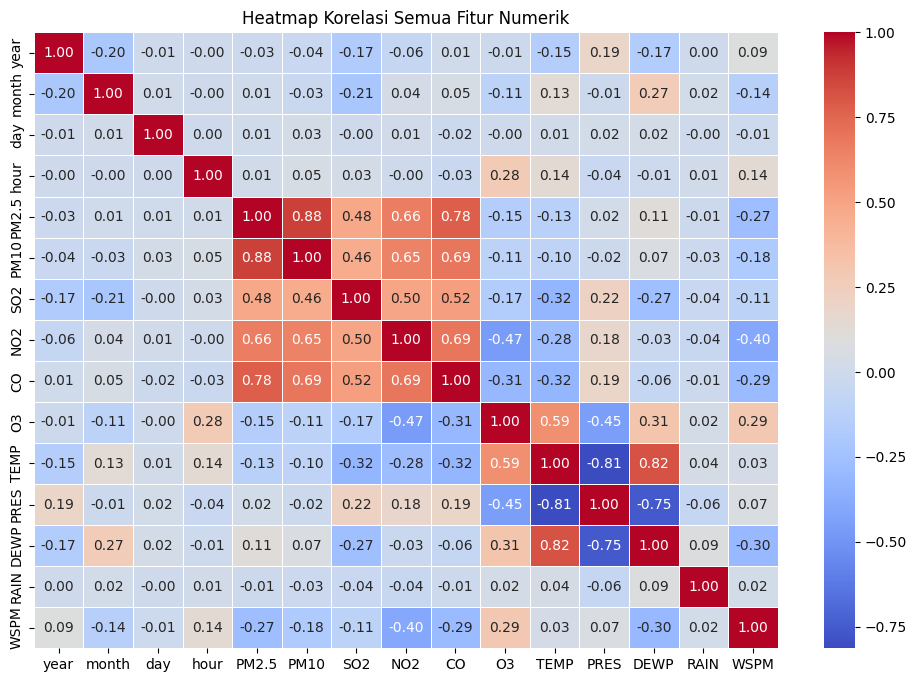

In [19]:
# Visualisasi Korelasi Data
numeric_cols = df_all.select_dtypes(include=['int64', 'float64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df_all[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Semua Fitur Numerik")
plt.show()

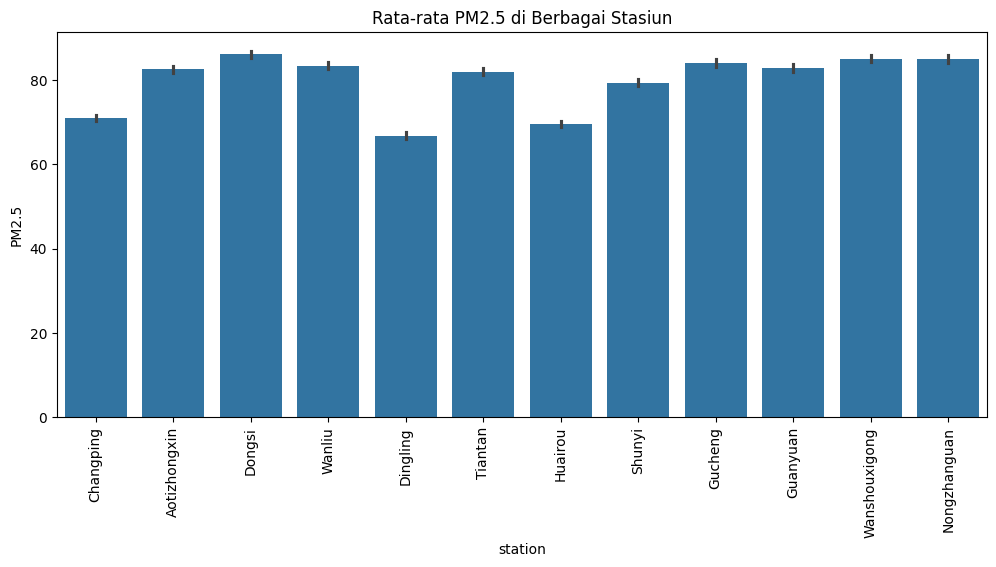

In [20]:
plt.figure(figsize=(12, 5))
sns.barplot(x="station", y="PM2.5", data=df_all, estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Rata-rata PM2.5 di Berbagai Stasiun")
plt.show()

**Insight:**
- Polusi udara (PM2.5) memiliki korelasi yang kuat dengan PM10, CO, dan NO2, yang menunjukkan bahwa polutan tersebut berasal dari sumber yang mirip.
- Beberapa stasiun memiliki tingkat polusi yang lebih tinggi, menunjukkan adanya pengaruh lokasi dan aktivitas manusia.
- Musim kemungkinan besar berpengaruh terhadap kadar PM2.5, terutama di musim dingin.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

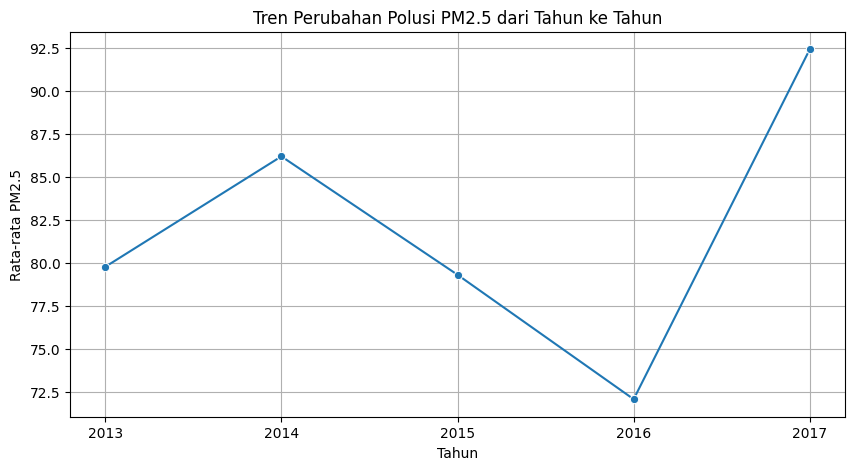

In [21]:
# Agregasi rata-rata tahunan PM2.5
pm25_trend = df_all.groupby(df_all['datetime'].dt.year)['PM2.5'].mean()

# Visualisasi tren PM2.5
plt.figure(figsize=(10, 5))
sns.lineplot(x=pm25_trend.index, y=pm25_trend.values, marker='o', linestyle='-')
plt.xticks(ticks=pm25_trend.index.astype(int))
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.title('Tren Perubahan Polusi PM2.5 dari Tahun ke Tahun')
plt.grid()
plt.show()

### Pertanyaan 2:

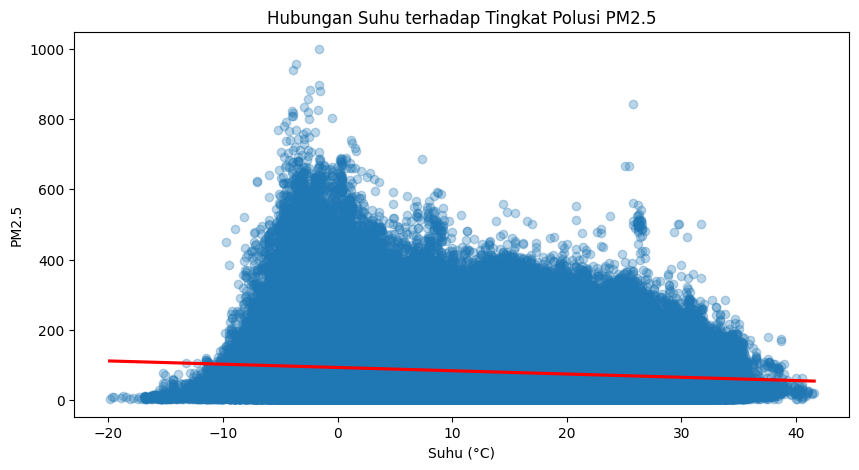

In [22]:
# Scatter plot suhu vs PM2.5
plt.figure(figsize=(10, 5))
sns.regplot(x=df_all['TEMP'], y=df_all['PM2.5'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel('Suhu (°C)')
plt.ylabel('PM2.5')
plt.title('Hubungan Suhu terhadap Tingkat Polusi PM2.5')
plt.show()

**Insight:**
Dari grafik tren PM2.5 per tahun, terlihat bahwa:
- Tahun 2013-2014: Terjadi peningkatan rata-rata polusi PM2.5, menunjukkan kemungkinan kondisi lingkungan yang memburuk atau peningkatan aktivitas industri dan kendaraan.
- Tahun 2014-2016: Tren menurun secara signifikan, yang bisa disebabkan oleh kebijakan pengendalian polusi, perubahan cuaca, atau penurunan aktivitas industri.
- Tahun 2016-2017: Polusi PM2.5 kembali meningkat drastis, kemungkinan dipicu oleh faktor cuaca, kebijakan yang kurang efektif, atau peningkatan aktivitas yang berkontribusi terhadap polusi udara.

Dari scatter plot yang menunjukkan hubungan antara suhu dan polusi PM2.5:
- Polusi PM2.5 lebih tinggi saat suhu berada di sekitar 0°C hingga 10°C.
- Pada suhu ekstrem (sangat dingin atau sangat panas), polusi cenderung lebih rendah.
- Tren regresi (garis merah) menunjukkan korelasi negatif yang lemah antara suhu dan tingkat polusi, artinya ketika suhu meningkat, tingkat PM2.5 sedikit menurun.

## Conclusion

- Conclution pertanyaan 1 :
Tren perubahan polusi PM2.5 menunjukkan adanya fluktuasi signifikan dari tahun ke tahun. Pada periode 2013-2014, terjadi peningkatan kadar PM2.5 yang kemungkinan besar disebabkan oleh meningkatnya aktivitas industri, kendaraan, atau faktor lingkungan lainnya. Namun, pada 2014-2016, polusi mengalami penurunan yang cukup drastis, yang dapat dikaitkan dengan implementasi kebijakan pengendalian polusi, perubahan pola cuaca, atau penurunan aktivitas yang berkontribusi terhadap emisi polutan. Sayangnya, tren ini kembali berbalik pada 2016-2017, di mana polusi mengalami lonjakan tajam. Peningkatan ini bisa dipengaruhi oleh faktor cuaca, perubahan kebijakan yang kurang efektif, atau meningkatnya aktivitas ekonomi dan industri. Fluktuasi ini mengindikasikan bahwa kualitas udara sangat dipengaruhi oleh kombinasi berbagai faktor, termasuk kebijakan lingkungan, perubahan iklim, dan pola aktivitas manusia.
- Conclution pertanyaan 2 :
Analisis hubungan antara suhu dan tingkat polusi PM2.5 menunjukkan bahwa polusi cenderung lebih tinggi saat suhu berada di kisaran 0°C hingga 10°C. Hal ini dapat disebabkan oleh peningkatan aktivitas pembakaran bahan bakar untuk pemanasan, emisi kendaraan, serta kondisi atmosfer yang mendukung akumulasi polutan di udara. Sebaliknya, pada suhu ekstrem, baik sangat dingin maupun sangat panas, konsentrasi PM2.5 cenderung lebih rendah. Pola ini menunjukkan bahwa pada suhu yang lebih tinggi, polutan mungkin lebih mudah terdispersi atau mengalami reaksi kimia yang mengurangi konsentrasinya. Garis tren regresi menunjukkan korelasi negatif yang lemah antara suhu dan polusi, yang berarti bahwa meskipun ada kecenderungan penurunan PM2.5 seiring meningkatnya suhu, faktor-faktor lain seperti kelembaban, angin, dan sumber emisi juga berperan penting dalam menentukan kualitas udara.